# Clustering the Military Powers of Countries

In this project, we have a dataset containing countries' military power, the military vehicles that enable them to achieve this power, and demographic data. Using this dataset, we will cluster the countries based on their military power.

<img src='https://img.freepik.com/free-vector/army-infographics-template-with-world-map-center-military-transport-graphs-diagrams-vector-illustration_1284-33502.jpg' >

### Import Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('World military power.xlsx',header=1)

### EDA and Feature Engineering

In [3]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.0
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.0,Argentina,0.0,Argentina,2.0,Argentina,4.0,Argentina,0.0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [5]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


Country names are repeated frequently. To make the data more understandable, we will simplify our DataFrame by only selecting the country names and the columns with "value" in the header.

In [6]:
df_country=df[['Military Strength','Military Strength Power Index']]

In [7]:
df_values= df.filter(like='value')

In [8]:
df=pd.concat([df_country,df_values],axis=1)

In [9]:
df = df.rename(columns={'Military Strength': 'Country'})

In [10]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [12]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [13]:
df[df['Total Coastline Coverage value'].isna()]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.1251,64,0,9,3,13,37,20,110,748,38,150,68,0.0,NaN,NaN,NaN,NaN,"1,38,50,00,000","10,41,00,00,000",11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.0
7,Austria,0.9568,120,15,0,11,32,62,0,56,467,33,0,0,0.0,NaN,NaN,NaN,NaN,"3,38,00,00,000","6,30,80,00,00,000",52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.0
11,Belarus,0.8179,202,39,68,4,28,63,21,532,1560,482,228,238,0.0,NaN,NaN,NaN,NaN,"62,37,02,800","39,92,00,00,000",65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.0
13,Bhutan,10.1681,2,0,0,0,0,2,0,0,27,0,0,0,0.0,NaN,NaN,NaN,NaN,"2,51,20,000","2,67,10,00,000",2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.0
14,Bolivia,0.9942,69,0,0,14,23,38,0,54,137,0,86,0,173.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855,59330,60000,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000,7252.0
16,Botswana,2.0582,45,10,0,11,8,16,0,55,245,0,30,20,NaN,NaN,NaN,NaN,NaN,"45,00,00,000","2,18,70,00,000",74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.0
19,Burkina Faso,1.9009,16,0,3,1,4,8,2,0,350,0,0,0,NaN,NaN,NaN,NaN,NaN,"13,00,00,000","3,05,60,00,000",23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.0
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.0
24,Chad,1.6383,35,0,6,6,4,17,3,60,372,10,51,10,NaN,NaN,NaN,NaN,NaN,"20,00,00,000","1,72,40,00,000",59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.0
30,Czechia,0.5531,95,12,16,8,15,44,15,116,682,86,85,0,NaN,NaN,NaN,NaN,NaN,"2,96,90,00,000","2,05,20,00,00,000",128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.0


These countries do not have a coastline, so we will fill the empty values in this column with zero.

In [14]:
df['Total Coastline Coverage value']=df['Total Coastline Coverage value'].fillna(0)

In [15]:
df.isnull().sum().sort_values(ascending=False)

Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Trainer Aircraft Fleet value                0
defense spending budget value               0
Total Waterway Coverage value               0
Total Coastline Coverage value              0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
Aircraft Strength value                     0
Helicopter Fleet Strength value             0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

These countries have no Aircraft Carrier Fleet, Frigate Fleet, Destroyer Fleet, Submarine Fleet, Navy Fleet. So we can fill the empty rows with zero.

In [16]:
df['Aircraft Carrier Fleet Strength value']=df['Aircraft Carrier Fleet Strength value'].fillna(0)
df['Frigate Fleet Strength value']=df['Frigate Fleet Strength value'].fillna(0)
df['Destroyer Fleet Strength value']=df['Destroyer Fleet Strength value'].fillna(0)
df['Submarine Fleet Strength value']=df['Submarine Fleet Strength value'].fillna(0)
df['Navy Fleet Strengths value']=df['Navy Fleet Strengths value'].fillna(0)

In [17]:
df[df['Total Border Coverage value'].isna()]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
9,Bahrain,1.8547,109,17,0,2,37,65,22,180,843,33,26,17,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN
57,Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155.0,4.0,20.0,40.0,0.0,"49,00,00,00,000","32,40,00,00,00,000",175,3841,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751,1770,NaN
69,Madagascar,3.0869,6,0,0,0,0,6,0,12,103,0,25,0,8.0,0.0,0.0,0.0,0.0,"11,50,00,000","4,08,90,00,000",83,0,18500,0,"1,01,45,026","2,56,83,610","5,87,040",4828,600,NaN
83,New Zealand,1.3684,48,0,0,7,13,22,0,0,200,0,24,0,11.0,0.0,0.0,0.0,2.0,"4,30,00,00,000","91,62,00,00,000",123,31480,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134,0,NaN
95,Philippines,0.7852,171,0,19,23,24,97,0,7,513,0,286,0,103.0,0.0,0.0,0.0,2.0,"3,47,00,00,000","76,18,00,00,000",247,15000,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289,3219,NaN
105,Singapore,0.7966,235,100,0,9,36,77,17,180,3000,48,77,24,40.0,0.0,0.0,0.0,6.0,"11,20,00,00,000","5,66,10,00,00,000",9,0,"13,40,000",0,"40,17,314","59,95,991",697,193,10,NaN
113,Sri Lanka,1.4661,77,0,0,15,6,54,9,202,570,0,209,22,40.0,0.0,0.0,0.0,0.0,"2,50,00,00,000","51,72,00,00,000",19,0,90000,0,"1,09,27,071","2,25,76,592",65610,1340,160,NaN
119,Taiwan,0.4008,744,289,0,19,207,210,91,1180,2000,482,1160,115,117.0,0.0,4.0,4.0,22.0,"10,72,50,00,000","1,81,90,00,00,000",37,196,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980,1566,3720,NaN


These countries are island countries. So these countries have no borders to any country. Border coverage value will be zero.

In [18]:
df['Total Border Coverage value']=df['Total Border Coverage value'].fillna(0)

Now, we will handle the data that, despite being numerical, cannot be treated as such due to the presence of dots and commas.

In [19]:
for col in df.columns:
    if df[col].dtype=='object' and col != 'Country' :
        df[col]=df[col].astype(str)
        df[col]=df[col].str.replace(',','')
        df[col]=df[col].str.replace('.','')
        df[col] = pd.to_numeric(df[col])
    else:
        continue

In [20]:
df.isnull().sum().sort_values(ascending=False)

Country                                    0
Submarine Fleet Strength value             0
Total Waterway Coverage value              0
Total Coastline Coverage value             0
Total Square Land Area value               0
Total Population value                     0
Available Manpower value                   0
Proven Oil Reserves value                  0
Oil Consumption value                      0
Oil Production value                       0
Airport Totals value                       0
External Debt value                        0
defense spending budget value              0
Frigate Fleet Strength value               0
Destroyer Fleet Strength value             0
Aircraft Carrier Fleet Strength value      0
Military Strength Power Index              0
Navy Fleet Strengths value                 0
Rocket Projector Strength value            0
Towed Artillery Strength value             0
Self-Propelled Artillery Strength value    0
AFV/APC Strength value                     0
Tank Stren

In [21]:
df.head()

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,12000000000,2840000000,43,0,5500,0,14325743,34940837,652230,0,1200,5987.0
1,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,250000000,9505000000,4,16000,42500,168300000,1519438,3057220,28748,362,41,691.0
2,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,13000000000,6260000000,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734.0
3,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7000000000,42080000000,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369.0
4,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4200000000,214900000000,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [54]:
df.corr(numeric_only=True)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.381789,-0.165904,-0.274310,-0.175763,-0.359353,-0.192424,-0.235734,-0.173362,-0.263961,-0.282414,-0.183438,-0.236737,-0.242678,-0.258779,-0.183884,-0.240222,-0.247132,-0.241709
Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.532988,0.917490,0.668296,0.910945,0.245784,0.955621,0.800685,0.884260,0.625914,0.903431,0.125047,0.385843,0.403410,0.586455,0.152612,0.445029,0.414819,0.198522
Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.669301,0.798292,0.795633,0.868577,0.456029,0.892206,0.693046,0.733474,0.622783,0.923384,0.141509,0.566067,0.570915,0.619211,0.144830,0.551287,0.486221,0.248046
Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.634499,0.656503,0.760027,0.733666,0.330954,0.741498,0.547148,0.663088,0.731814,0.773883,0.162843,0.459166,0.465651,0.773643,0.162162,0.656929,0.608929,0.144081
Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.525189,0.870720,0.653850,0.868431,0.249392,0.912735,0.759182,0.874719,0.668640,0.878218,0.154009,0.429612,0.449885,0.671585,0.171698,0.507041,0.513081,0.172877
Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.466886,0.931511,0.580384,0.882600,0.183922,0.934795,0.813180,0.899261,0.569708,0.855577,0.123859,0.297804,0.321369,0.500443,0.158804,0.338359,0.316252,0.195692
Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.473208,0.936468,0.605006,0.904609,0.173110,0.958026,0.825917,0.904459,0.595627,0.877732,0.106103,0.313245,0.333446,0.537483,0.142145,0.385513,0.361978,0.182569
Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.512729,0.852663,0.680367,0.878550,0.244460,0.894450,0.738504,0.812823,0.665574,0.846129,0.124168,0.319627,0.329679,0.648221,0.143269,0.515447,0.440390,0.180408
Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.691684,0.370139,0.743171,0.448035,0.337516,0.420121,0.258375,0.346984,0.567311,0.481247,0.146265,0.363193,0.371196,0.617159,0.119993,0.531206,0.481161,0.009203
AFV/APC Strength value,-0.361796,0.844898,0.932691,0.871821,0.818061,0.773963,0.798437,0.860358,0.778759,1.000000,0.790061,0.765663,0.751266,0.696010,0.651483,0.772614,0.731149,0.497681,0.771662,0.566182,0.591883,0.683281,0.844824,0.221302,0.553925,0.549386,0.644503,0.141088,0.580005,0.501611,

<Axes: >

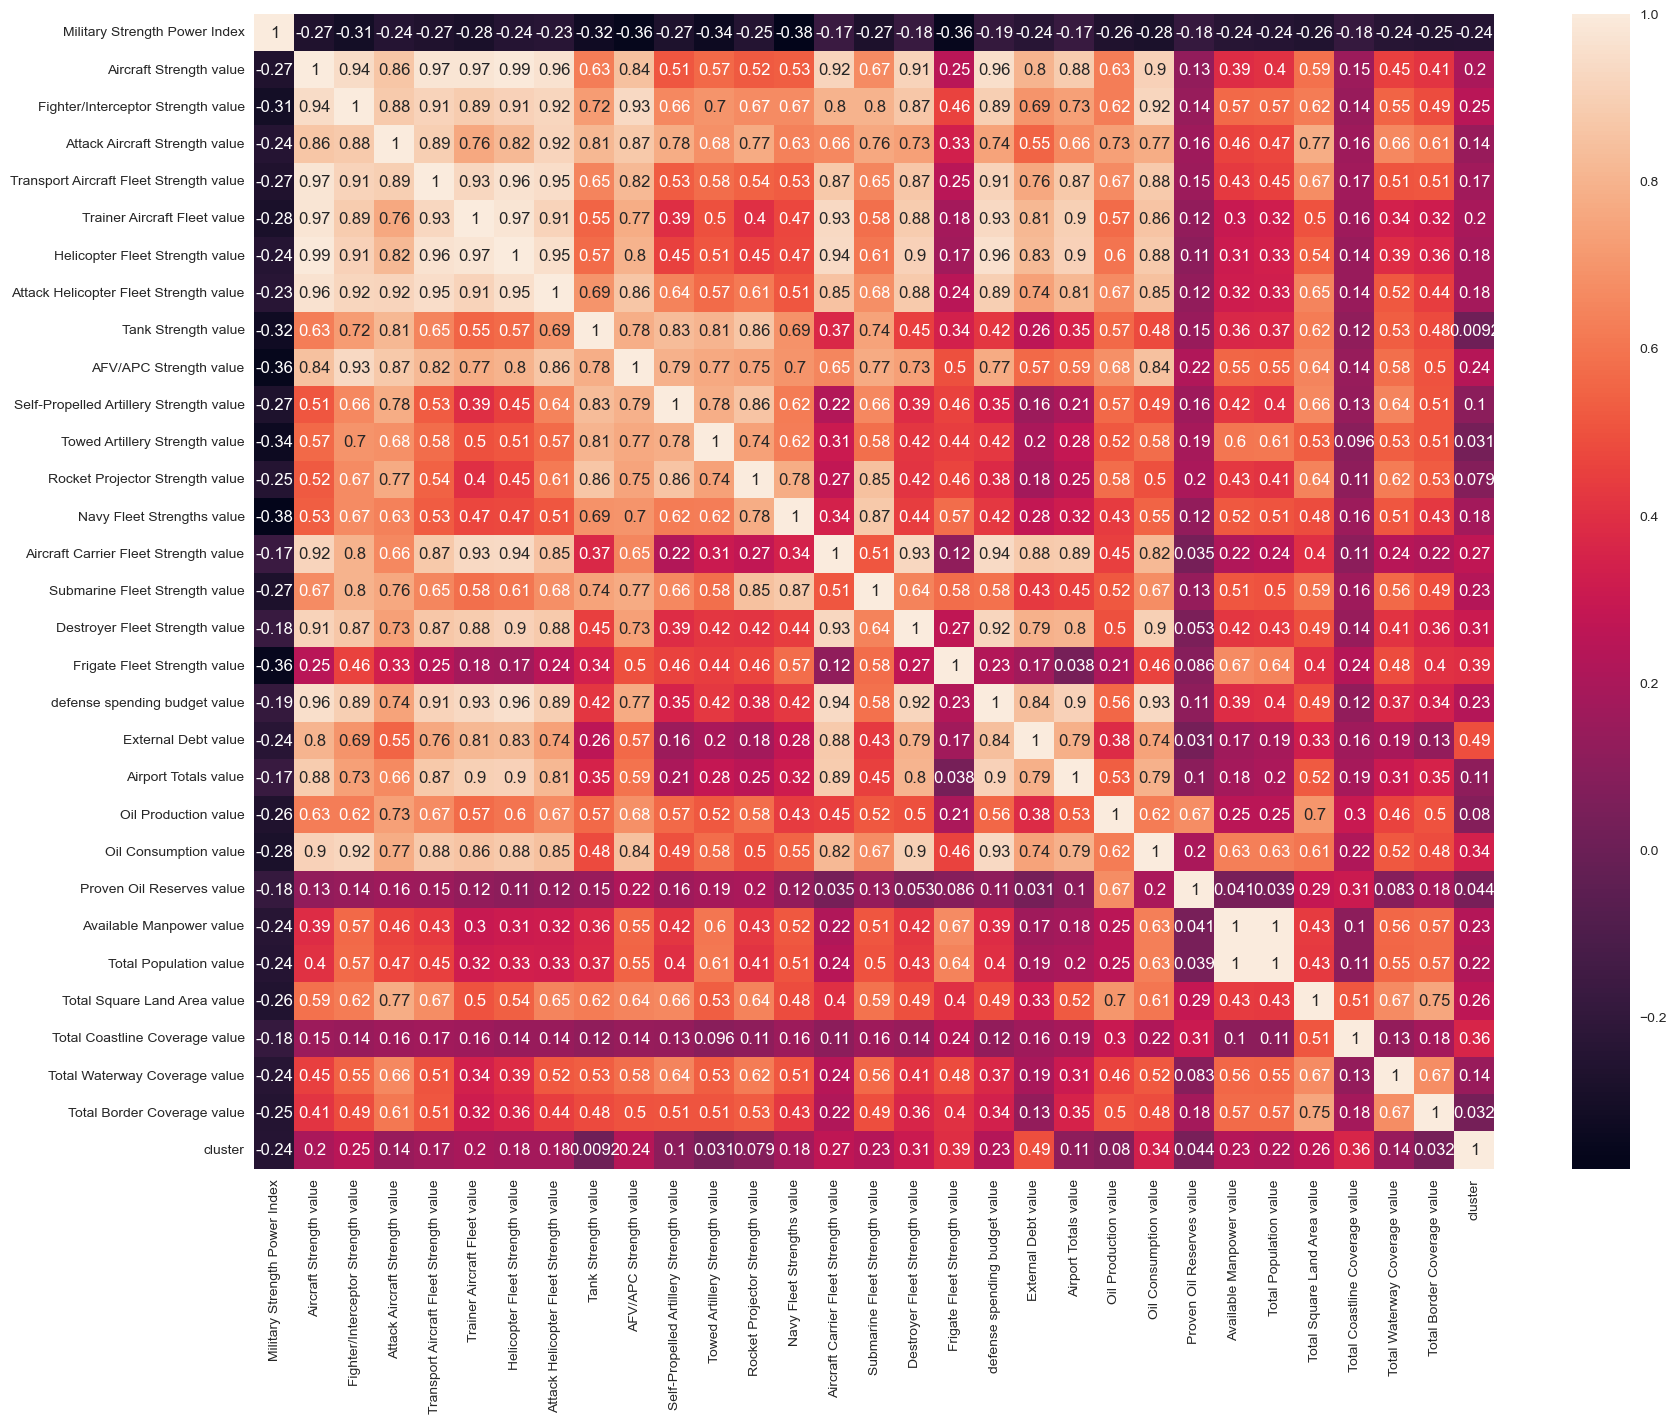

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Clustering the Data

In [26]:
x=df.drop('Country',axis=1)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram,linkage

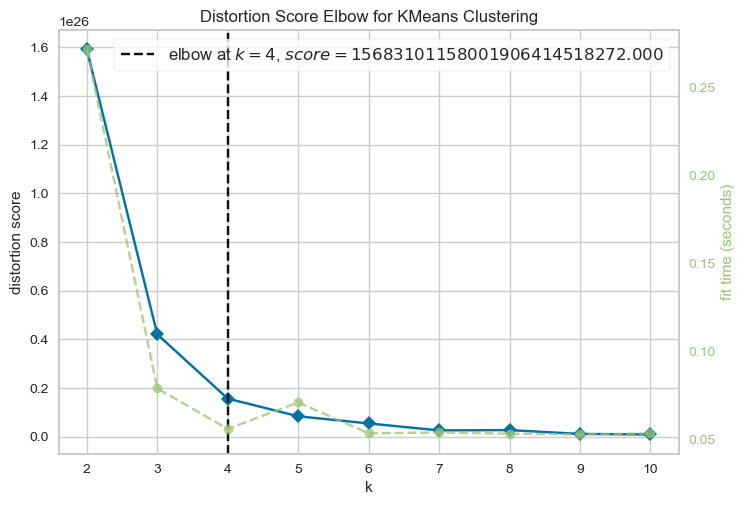

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
km=KMeans()
vis=KElbowVisualizer(km,K=(2,10))
vis.fit(x)
vis.show()

In [29]:
model=KMeans(4)

In [30]:
model=model.fit(x)

In [31]:
pred=model.predict(x)

In [32]:
x['cluster']=pred
df['cluster']=pred

In [39]:
df.sample(10)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
54,Israel,0.3111,589,259,18,15,154,146,48,2760,10275,650,300,100,65.0,0.0,5.0,0.0,0.0,20000000000,88660000000,47,390,250000,12730000,3647983,8424904,20770,273,0,1068.0,0
51,Iran,0.2191,509,155,23,62,94,100,12,2056,4300,570,2088,1935,398.0,0.0,34.0,0.0,7.0,19600000000,7995000000,319,4469000,2000000,158400000000,47324105,83024745,1648195,2440,850,5894.0,0
65,Lebanon,2.5193,70,0,9,0,0,55,0,366,2228,12,374,30,57.0,0.0,0.0,0.0,0.0,2500000000,39300000000,8,0,110000,0,2135026,6100075,10400,225,170,484.0,0
94,Peru,0.6219,273,17,38,40,77,99,16,146,552,24,231,70,60.0,0.0,5.0,0.0,7.0,2560000000,66250000000,191,43520,210000,473000000,15352302,31331228,1285216,2414,8808,7062.0,0
61,Kuwait,1.5701,85,27,0,2,13,40,16,367,745,98,0,27,38.0,0.0,0.0,0.0,0.0,6831000000,47240000000,7,2753000,345000,101500000000,1641971,2916467,17818,499,0,475.0,0
36,El Salvador,3.1291,51,0,15,2,3,31,0,0,125,0,70,0,4.0,0.0,0.0,0.0,0.0,167000000,15510000000,68,0,45600,0,3106010,6187271,21041,307,0,590.0,0
55,Italy,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249.0,2.0,8.0,4.0,12.0,27800000000,2444000000000,129,77530,1300000,556700000,28011003,62246674,301340,7600,2400,1836.0,3
116,Sweden,0.5304,204,71,0,6,69,53,0,126,1036,88,0,0,63.0,0.0,5.0,0.0,0.0,6326923600,939900000000,231,0,320000,0,4116808,10040995,450295,3218,2052,2211.0,0
67,Libya,1.3696,114,17,2,4,62,26,7,250,450,50,100,55,5.0,0.0,0.0,0.0,1.0,3000000000,3020000000,146,897100,315000,48360000000,3552871,6754507,1759540,1770,0,4339.0,0
119,Taiwan,0.4008,744,289,0,19,207,210,91,1180,2000,482,1160,115,117.0,0.0,4.0,4.0,22.0,10725000000,181900000000,37,196,1032000,2380000,12196809,23545963,35980,1566,3720,0.0,0


In [40]:
silhouette_score(x,pred)

0.8671436271439987

In [41]:
x["cluster"].value_counts()

cluster
0    124
3      9
2      4
1      1
Name: count, dtype: int64

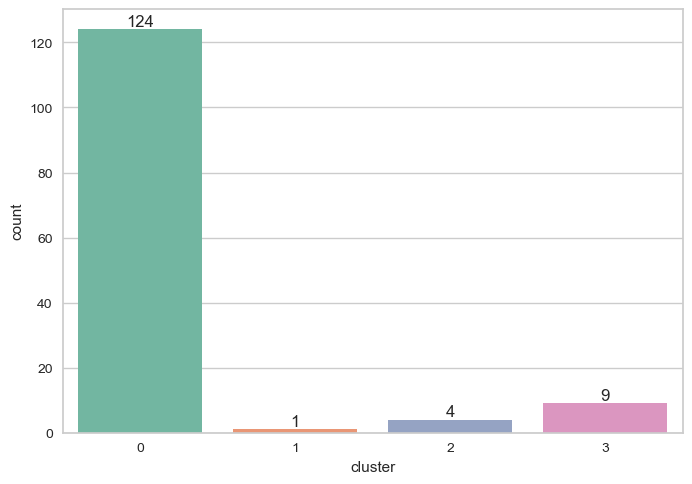

In [42]:
ax=sns.countplot(x='cluster',data=x,palette='Set2');
for container in ax.containers:
    ax.bar_label(container)

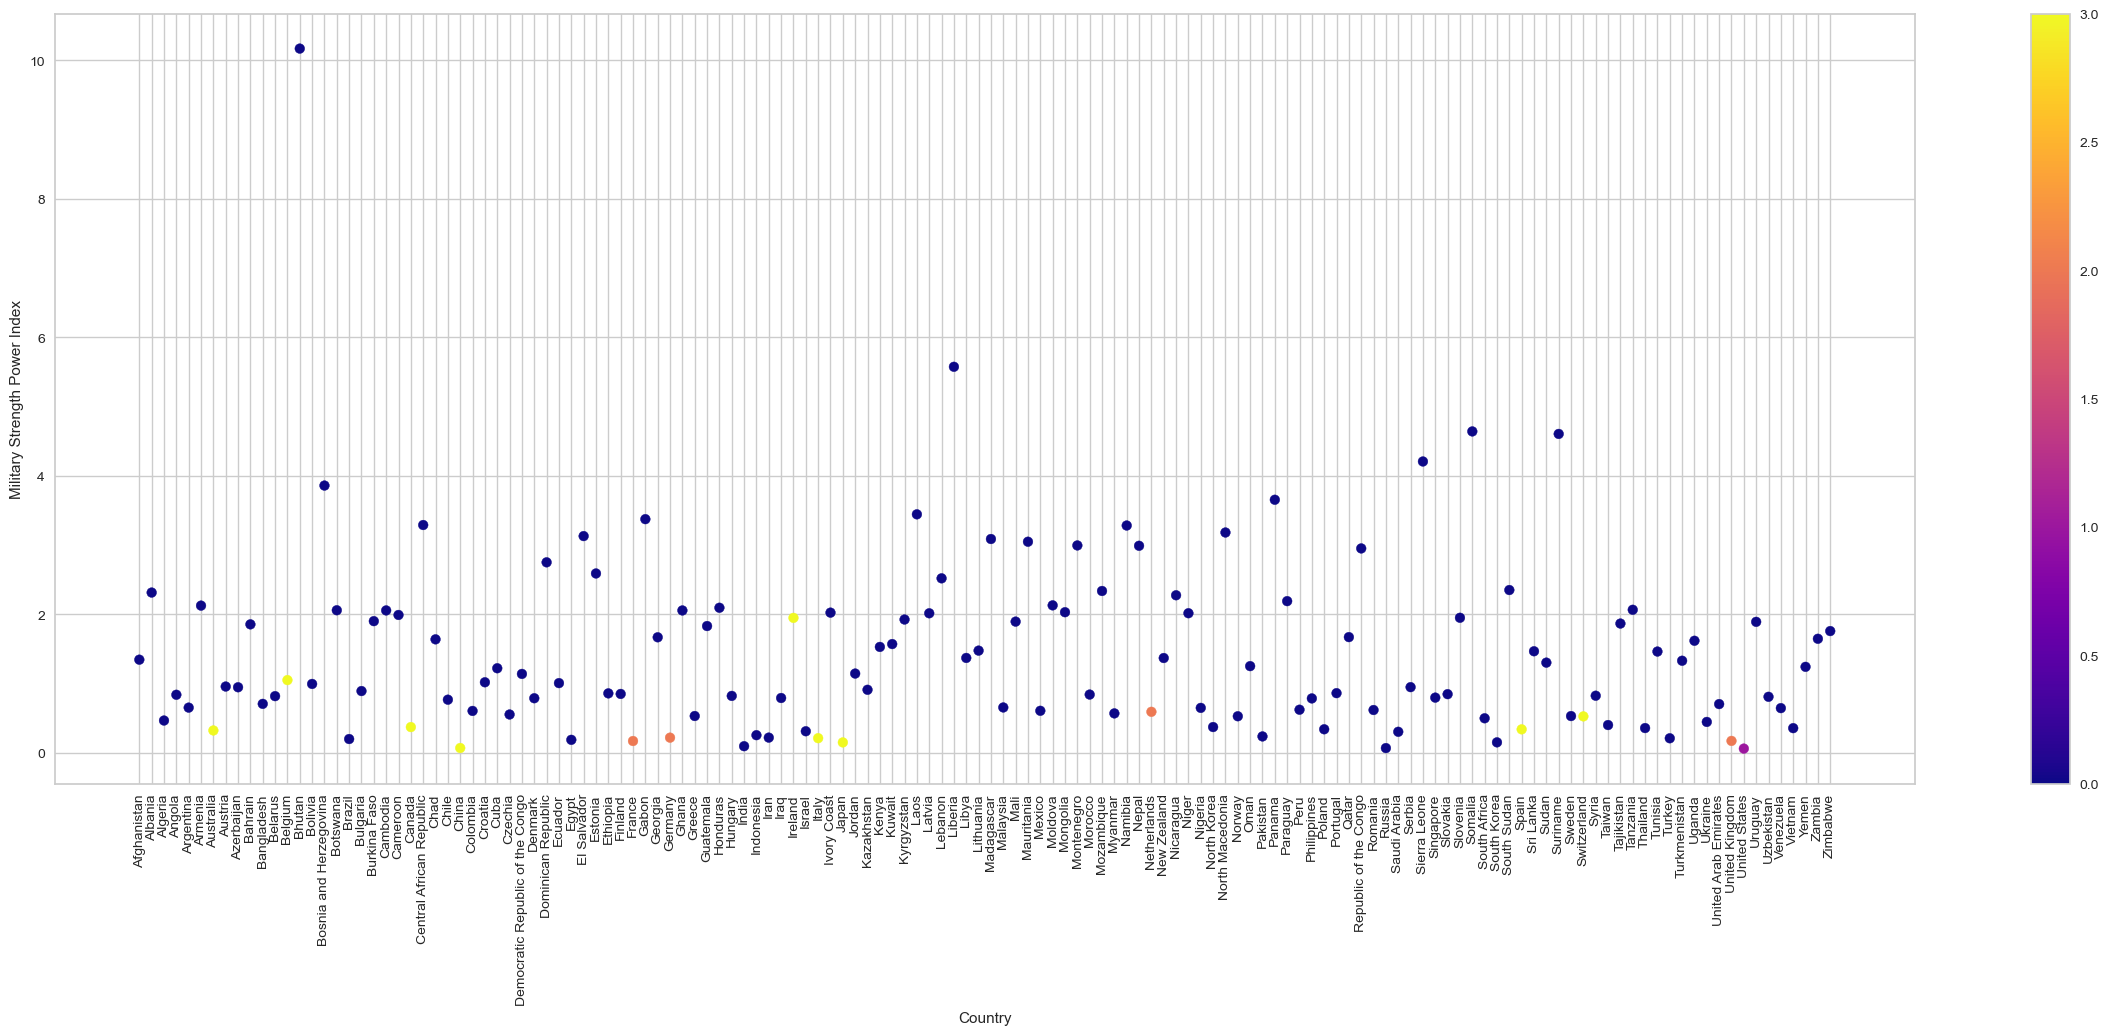

In [52]:
plt.figure(figsize=(30,10))
plt.scatter(df['Country'], df['Military Strength Power Index'], c=pred, cmap='plasma')
plt.colorbar()
plt.xlabel('Country')
plt.ylabel('Military Strength Power Index')
plt.xticks(rotation=90);

In [60]:
df[df['cluster']==1]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
130,United States,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490.0,20.0,66.0,91.0,0.0,750000000000,17910000000000,13513,9352000,20000000,36520000000,144872845,329256465,9826675,19924,41009,12048.0,1


In [61]:
df[df['cluster']==2]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
40,France,0.1702,1229,269,0,121,187,589,62,528,6028,109,12,13,180.0,4.0,9.0,11.0,11.0,41500000000,5360000000000,464,15170,1600000,72350000,30111868,67364357,643801,4853,8501,4072.0,2
43,Germany,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80.0,0.0,6.0,0.0,9.0,50000000000,5326000000000,539,43410,2500000,145400000,37010559,80457737,357022,2389,7467,3694.0,2
82,Netherlands,0.5919,168,61,1,4,27,75,28,18,1546,57,160,0,63.0,0.0,4.0,0.0,6.0,12419000000,4063000000000,29,18170,840000,113200000,7820960,17151228,41543,451,6237,1053.0,2
129,United Kingdom,0.1717,733,133,15,44,241,312,49,227,5000,89,126,35,88.0,2.0,10.0,6.0,13.0,55100000000,8126000000000,460,910500,1600000,2564000000,29948413,65105246,243610,12429,3200,443.0,2


In [62]:
df[df['cluster']==3]

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48.0,2.0,6.0,2.0,8.0,26300000000,1714000000000,480,263000,1005000,1821000000,10808002,23470145,7741220,25760,2000,0.0,3
12,Belgium,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17.0,0.0,0.0,0.0,2.0,4921000000,1281000000000,41,0,645000,0,4833107,11570762,30528,67,2043,1297.0,3
22,Canada,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64.0,0.0,4.0,0.0,12.0,22500000000,1608000000000,1467,3977000,2500000,169700000000,16110865,35881659,9984670,202080,636,8893.0,3
26,China,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777.0,2.0,74.0,36.0,52.0,237000000000,1598000000000,507,3838000,13500000,25620000000,752855402,1384688986,9596961,14500,110000,22457.0,3
53,Ireland,1.9481,19,0,0,0,8,8,0,0,124,0,0,0,8.0,0.0,0.0,0.0,0.0,870000000,2470000000000,40,0,145000,0,2366779,5068050,70273,1448,956,443.0,3
55,Italy,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249.0,2.0,8.0,4.0,12.0,27800000000,2444000000000,129,77530,1300000,556700000,28011003,62246674,301340,7600,2400,1836.0,3
57,Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155.0,4.0,20.0,40.0,0.0,49000000000,3240000000000,175,3841,4000000,44120000,53873803,126168156,377915,29751,1770,0.0,3
112,Spain,0.3388,512,137,12,46,162,162,19,327,2023,95,140,0,77.0,1.0,3.0,0.0,11.0,15100000000,2094000000000,150,2252,1226000,150000000,23136275,49331076,505370,4964,1000,1953.0,3
117,Switzerland,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0.0,0.0,0.0,0.0,0.0,5000000000,1664000000000,63,0,260000,0,3632250,8292809,41277,0,1299,1770.0,3


### Conclusion

We read our dataset, which contains countries' military power and the inventory they derive this power from, using the pandas library. Then, using pandas again, we performed exploratory data analysis and understood the data. In the feature engineering stage, we filled in the missing data and converted the non-country name part of the dataset into numeric data as needed. Afterward, with the help of the yellowbrick library, we used the elbow method and found that we could divide the data into 4 clusters. Using the KMeans algorithm, we clustered the data into 4 groups and achieved a silhouette score of 0.87. Then, using the seaborn library, we visualized the data and observed the clusters. 

As expected, the USA was in a cluster by itself as a military power. In our second cluster, there were 4 countries, and in the third cluster, there were 9 countries. Upon examination, we saw that these were developed countries. The remaining countries formed our final cluster.